In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler

X = np.load('../Language_digits/X.npy')
Y = np.load('../Language_digits/Y.npy')

X


array([[[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 ,
         0.5137255 , 0.5019608 ],
        [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 ,
         0.5176471 , 0.50980395],
        [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 ,
         0.5254902 , 0.5137255 ],
        ...,
        [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 ,
         0.54509807, 0.53333336],
        [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807,
         0.53333336, 0.52156866],
        [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 ,
         0.52156866, 0.50980395]],

       [[0.59607846, 0.60784316, 0.61960787, ..., 0.4627451 ,
         0.4509804 , 0.44313726],
        [0.60784316, 0.61960787, 0.6313726 , ..., 0.4745098 ,
         0.4627451 , 0.4509804 ],
        [0.6156863 , 0.627451  , 0.6431373 , ..., 0.4862745 ,
         0.4745098 , 0.4627451 ],
        ...,
        [0.50980395, 0.5176471 , 0.5254902 , ..., 0.40392157,
         0.39607844, 0.3882353 ],
        [0.5

In [2]:
import random

random.seed(7)
sample_list= random.sample(list(X), 9)
print("random List", sample_list)

random List [array([[0.47058824, 0.49803922, 0.52156866, ..., 0.49411765, 0.49019608,
        0.4862745 ],
       [0.48235294, 0.5058824 , 0.5294118 , ..., 0.5058824 , 0.5019608 ,
        0.49411765],
       [0.4862745 , 0.50980395, 0.53333336, ..., 0.5137255 , 0.50980395,
        0.49803922],
       ...,
       [0.52156866, 0.53333336, 0.5411765 , ..., 0.54901963, 0.5372549 ,
        0.5254902 ],
       [0.5137255 , 0.5254902 , 0.53333336, ..., 0.54509807, 0.5372549 ,
        0.5254902 ],
       [0.5058824 , 0.5176471 , 0.52156866, ..., 0.54509807, 0.53333336,
        0.52156866]], dtype=float32), array([[0.4509804 , 0.4627451 , 0.46666667, ..., 0.40784314, 0.4       ,
        0.3882353 ],
       [0.45882353, 0.47058824, 0.48235294, ..., 0.41568628, 0.40784314,
        0.4       ],
       [0.46666667, 0.48235294, 0.49803922, ..., 0.42352942, 0.41568628,
        0.40784314],
       ...,
       [0.5176471 , 0.5372549 , 0.5568628 , ..., 0.4862745 , 0.46666667,
        0.44313726],
      

In [3]:
X_list=np.array(sample_list)

In [4]:
X_list.shape

(9, 64, 64)

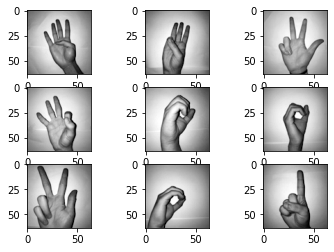

In [5]:
from matplotlib import pyplot
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_list[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

# 1-Feature standardization

It is also possible to standardize pixel values across the entire dataset. This is called feature standardization and mirrors the type of standardization often performed for each column in a tabular dataset.

In [6]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


Using TensorFlow backend.


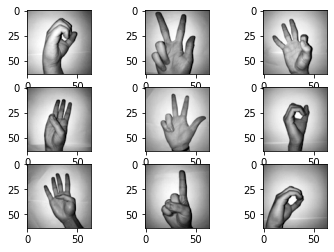

In [7]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# reshape to be [samples][width][height][channels]
X_list = X_list.reshape((X_list.shape[0], 64, 64, 1))
# convert from int to float
#X_list = X_list.astype('float32')

# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_list)
# configure batch size and retrieve one batch of images
for X_batch in datagen.flow(X_list, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(64, 64), cmap=pyplot.get_cmap('gray'))
        # show the plot
    pyplot.show()
    break


# 2-ZCA Whitening

A whitening transform of an image is a linear algebra operation that reduces the redundancy in the matrix of pixel images.

Less redundancy in the image is intended to better highlight the structures and features in the image to the learning algorithm.

Typically, image whitening is performed using the Principal Component Analysis (PCA) technique. More recently, an alternative called ZCA (learn more in Appendix A of this tech report) shows better results and results in transformed images that keeps all of the original dimensions and unlike PCA, resulting transformed images still look like their originals.

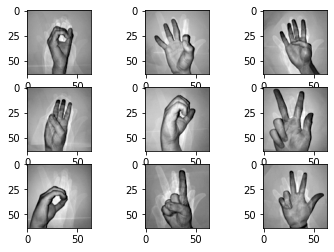

In [9]:
# reshape to be [samples][width][height][channels]
X_list = X_list.reshape((X_list.shape[0], 64, 64, 1))
# define data preparation
datagen = ImageDataGenerator(zca_whitening=True,featurewise_center=False)
# fit parameters from data
datagen.fit(X_list)
# configure batch size and retrieve one batch of images
for X_batch in datagen.flow(X_list, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(64, 64), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

# Random Rotations

Sometimes images in your sample data may have varying and different rotations in the scene.

You can train your model to better handle rotations of images by artificially and randomly rotating images from your dataset during training.

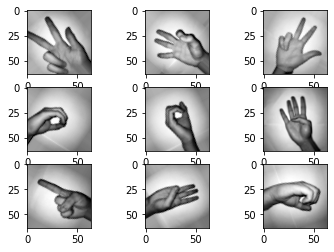

In [10]:
# reshape to be [samples][width][height][channels]
X_list = X_list.reshape((X_list.shape[0], 64, 64, 1))
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_list)
# configure batch size and retrieve one batch of images
for X_batch in datagen.flow(X_list, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(64, 64), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

# Random Shifts

Objects in your images may not be centered in the frame. They may be off-center in a variety of different ways.

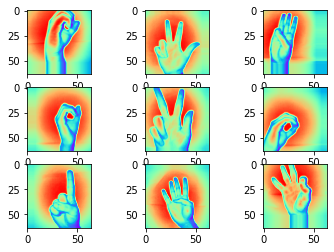

In [15]:
# reshape to be [samples][width][height][channels]
X_list = X_list.reshape((X_list.shape[0], 64, 64, 1))# define data preparation
# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_list)
# configure batch size and retrieve one batch of images
for X_batch in datagen.flow(X_list, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(64, 64), cmap=pyplot.get_cmap('rainbow'))
    # show the plot
    pyplot.show()
    break

# Random Flips

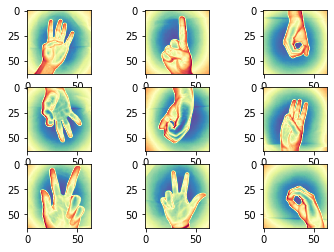

In [20]:
# reshape to be [samples][width][height][channels]
X_list = X_list.reshape((X_list.shape[0], 64, 64, 1))
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
datagen.fit(X_list)
# configure batch size and retrieve one batch of images
for X_batch in datagen.flow(X_list, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(64, 64), cmap=pyplot.get_cmap('Spectral'))
    # show the plot
    pyplot.show()
    break